# Lec 1-3 Linear Regression

## Data Preparation

In [1]:
X=[0,1,2,3,4,5,6]
Y=[0,1,2,3,4,5,6]

In [2]:
import matplotlib.pyplot as plt

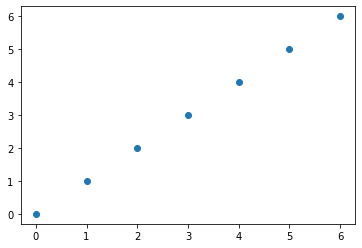

In [3]:
plt.scatter(X,Y)

## Model Define

In [4]:
class Hypo():
    def __init__(self,w,b):
        self.w=w
        self.b=b
        
    def hypothesis(self,x):
        if self.b == False:
            return self.w*x
        else :
            return self.w*x+b

## Cost Function Define

In [5]:
from IPython.display import Image

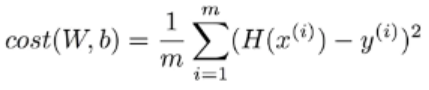

In [6]:
Image("/1.png") # 주피터 노트북에 이미지를 불러오는 코드입니다. 

In [7]:
def cost(h,X,Y): # MSE를 사용했을 때
    err=0
    for i in range(len(X)):
        err+=(h.hypothesis(X[i])-Y[i])**2
    err=err/len(X)
    return err

def cost1(h,X,Y):
    err=0
    for i in range(len(X)):
        err+=abs(h.hypothesis(X[i])-Y[i])
    err+=err/len(X)
    return err

## Cost Function Visualization

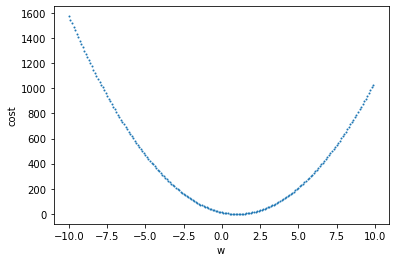

In [8]:
## bias가 없을 때 Cost Function을 시각화 해봅니다.

w_NO_bias=[]
cost_num1=[]

for i in range(-100,100):
    w=i*0.1
    b=False
    h1=Hypo(w,b)
    c=cost(h1,X,Y)
    w_NO_bias.append(w)
    cost_num1.append(c)
    
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(w_NO_bias,cost_num1,s=1)
    

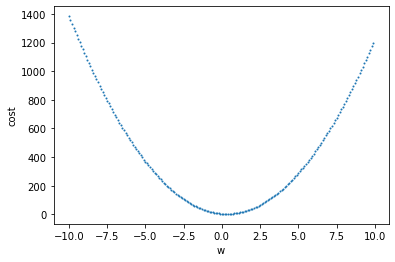

In [9]:
## bias가 있을 때

w_bias=[]
cost_num2=[]

for i in range(-100,100):
    w=i*0.1
    b=3
    h2=Hypo(w,b)
    c=cost(h2,X,Y)
    w_bias.append(w)
    cost_num2.append(c)
    
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(w_bias,cost_num2,s=1)

### MAE를 사용했을 때는?

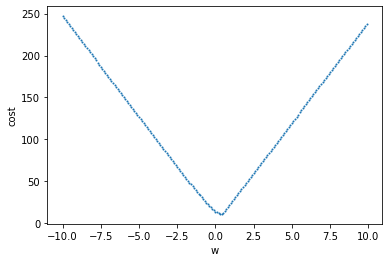

In [10]:
w_MAE=[]
cost_num3=[]

for i in range(-100,100):
    w=i*0.1
    b=3
    h3=Hypo(w,b)
    c=cost1(h3,X,Y)
    w_MAE.append(w)
    cost_num3.append(c)
    
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(w_MAE,cost_num3,s=1)

### weight와 bias를 range 함수를 써서 표현해봅니다.

In [11]:
weight_range=[]
bias_range=[]
cost_range=[]

for i in range(-30,30):
    w=i*0.1
    for j in range(-30,30):
        b=j*0.1
        h4=Hypo(w,b)
        c=cost(h4,X,Y)
        weight_range.append(w)
        bias_range.append(b)
        cost_range.append(c)

Text(0.5, 0, 'cost')

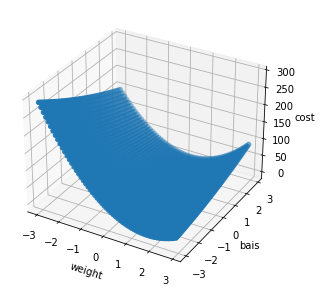

In [12]:
fig=plt.figure(figsize=(12,5))
ax=plt.subplot(1,1,1,projection='3d')
ax.scatter(weight_range,bias_range,cost_range,cmap='jet')
ax.set_xlabel('weight')
ax.set_ylabel('bais')
ax.set_zlabel('cost')

## Gradient Decent

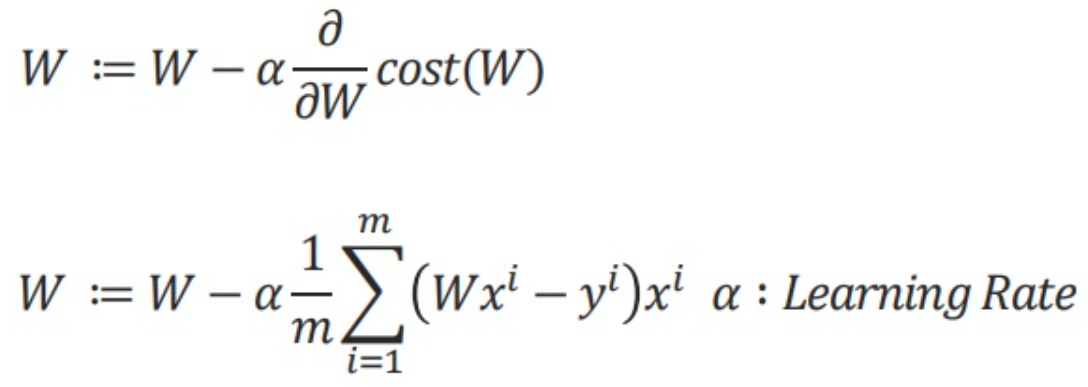

In [13]:
Image("/2.png")

### 수치해석적 vs 공식 대입

In [14]:
def Numerical_grad(w,cost):
    b=False
    h=Hypo(w,b)
    cost_list=cost(h,X,Y)
    eps=0.00001
    h=Hypo(w+eps,b)
    cost_list2=cost(h,X,Y)
    dcost=cost_list2-cost_list
    dw=eps
    grad=dcost/dw
    return grad,((cost_list+cost_list2)*0.5)

def Formular_grad(w,cost):
    b=False
    h=Hypo(w,b)
    grad=0
    for i in range(len(X)):
        grad +=2*(h.hypothesis(X[i])-Y[i])*X[i]
    grad=grad/len(X)
    c=cost(h,X,Y)
    return grad, c

### Start at w=2

In [15]:
w1=1.4
w2=1.4
lr=0.01

list_w1=[]
list_c1=[]
list_w2=[]
list_c2=[]

for i in range(100): #총 100 번의 학습 횟수
    grad, mean_cost = Numerical_grad(w1, cost)
    grad2, mean_cost2 = Formular_grad(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)

In [16]:
print(w1,mean_cost)

0.9999950000000335 3.2500000000743037e-10


In [17]:
print(w2,mean_cost2)

1.0000000000000335 2.667375378823807e-26


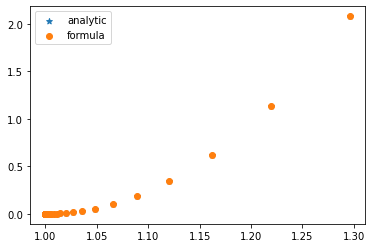

In [18]:
plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()